<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Faculty Notebook <br> (Day 2) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Parameter Estimation](#est)**
    - 2.1 - **[Point Estimation](#pt)**
        - 2.1.1 - **[Sampling Error](#err)**
    - 2.2 - **[Interval Estimation for Mean](#int)**
        - 2.2.1 - **[Large Sample Size](#large)**   
        - 2.2.2 - **[Small Sample Size](#small)**
    - 2.3 - **[Interval Estimation for Proportion](#prop)**
3. **[Test of Hypothesis](#defn)**
    - 3.1 - **[Types of Hypothesis](#types)**
4. **[Types of Test](#test_type)**
    - 4.1 - **[Two Tailed Test](#2tailed)**
    - 4.2 - **[One Tailed Test](#1tailed)**
5. **[Hypothesis Tests with Z Statistic](#eg)**
6. **[Error](#error)**
    - 6.1 - **[Power of Hypothesis Test](#power)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import 'random' to generate random sample
import random

# import statistics to perform statistical computation  
import statistics

# import 'stats' package from scipy library
from scipy import stats

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# to test the normality 
from scipy.stats import shapiro

# import the function to calculate the power of test
from statsmodels.stats import power

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id="est"></a>
# 2. Parameter Estimation

The value associated with the characteristic of the population is known as a `parameter` and the characteristic of the sample is described by a `statistic`.
Usually, the population parameters are not known in most of the real-life problems. Thus, we consider a subset of the population (sample) to estimate the population parameter using a sample statistic.

`Point estimation` and `Interval estimation` are two of the methods to estimate the population parameter.

<a id="pt"></a>
## 2.1 Point Estimation

This method considers a single value (sample statistic) as the population parameter. 

Let $X_{1}, X_{2}, X_{3},..., X_{n}$ be the random sample drawn from a population with mean $\mu$ and standard deviation $\sigma$. <br>
The point estimation method estimates the population mean, $\mu = \overline{X}$, where $\overline{X}$ is the sample mean and population standard deviation, $\sigma = s$, where $s$ is the standard deviation of the sample (`Standard Error`).

### Example:

#### 1. Consider the data of grade points for 35 students in a data science course. Select grades of 20 students randomly from the data and find the point estimate for the population mean.

     Grades: [59.1, 65.0, 75.8, 79.2, 95.0, 99.8, 89.1, 65.2, 41.9, 55.2, 94.8, 84.1, 83.2, 74.0, 75.5, 76.2, 79.1, 80.1, 
              92.1, 74.2, 59.2, 64.0, 75, 78.2, 95.6, 97.8, 89.5, 64.2, 41.8, 57.2, 85, 91.4, 81.8, 74.6, 90]

In [3]:
# given population
grades = [59.1, 65.0, 75.8, 79.2, 95.0, 99.8, 89.1, 65.2, 41.9, 55.2, 94.8, 84.1, 83.2, 74.0, 75.5, 76.2, 79.1, 80.1, 
          92.1, 74.2, 59.2, 64.0, 75, 78.2, 95.6, 97.8, 89.5, 64.2, 41.8, 57.2, 85, 91.4, 81.8, 74.6, 90]

# draw a sample for grades of 18 students without replacement
# set a random seed to get the same sample each time you run the code
random.seed(1)

# pass the data to the parameter, 'population'
# pass the required sample size to the parameter, 'k' 
samp_grades = random.sample(population = grades, k = 20)

# the point estimate for the population mean is equal to 'sample mean'
# calculate the sample mean
samp_mean = np.mean(samp_grades)

print('The point estimate for the population mean is', samp_mean)

The point estimate for the population mean is 75.32500000000002


Let us visualize the point estimate of the population mean.

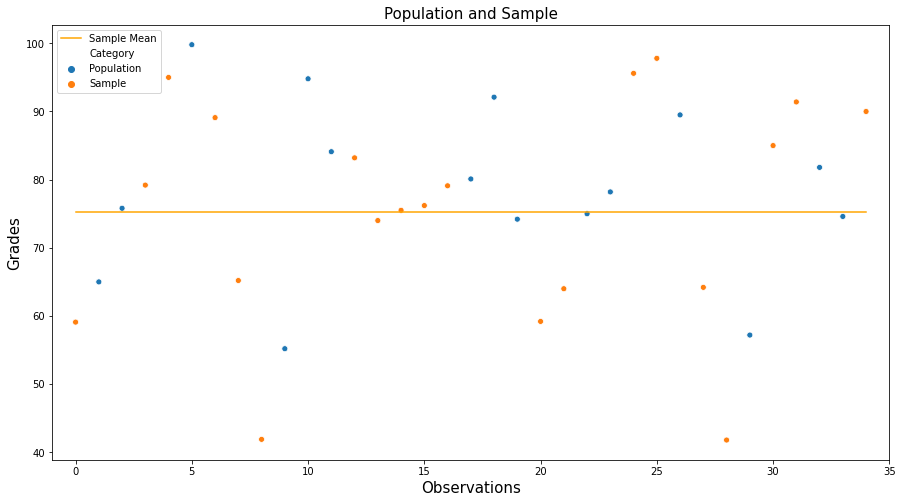

In [4]:
# create dataframes using dictionaries to store population
df_pop = pd.DataFrame(dict(Observation = grades, Category = 'Population'))

# use for loop and if condition to assign the category 'Sample' to all the points in the sample
for i in df_pop['Observation']:
    if i in samp_grades:
        df_pop['Category'][df_pop.Observation == i] = 'Sample'

# plot the scatter plot of population
# pass the indices of population to the parameter, 'x'
# pass the observations to the parameter, 'y'
# pass the label for the representation of population points to the parameter, 'label'
# pass the variable 'Category' in the dataframe to the parameter, 'hue'
# pass hte required order of the levels in the 'hue' variable to the parameter, 'hue_order'
sns.scatterplot(x = np.arange(0, len(grades)), y = grades, hue = df_pop['Category'], hue_order = ['Population', 'Sample'])

# plot a horizontal line at sample mean 
x, y = [0, 34], [samp_mean, samp_mean]
plt.plot(x, y, color = 'orange', label = 'Sample Mean')

# set the limit for x-axis
plt.xlim(-1, 35)

# add legend to the plot
# pass the required position of legend to the parameter, 'loc'
plt.legend(loc = 'upper left')

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Observations', fontsize = 15)
plt.ylabel('Grades', fontsize = 15)
plt.title('Population and Sample', fontsize = 15)

# display the plot
plt.show()

#### 2. A financial firm has created 50 portfolios. From them, a sample of 13 portfolios was selected, out of which 8 were found to be underperforming. Can you estimate the number of underperforming portfolios?

In [5]:
# total count of portfolios
N = 50

# number of portfolios in a sample
n = 13

# number of underperforming portfolios in a sample
x = 8

# sample proportion
p_samp = x/n

# estimate the number of underperforming portfolios
num_port = p_samp*N

# round the number to get an integer value
print('The number of underperforming portfolios:', round(num_port))

The number of underperforming portfolios: 31


<a id="err"></a>
### 2.1.1 Sampling Error

Sampling error is considered as the absolute difference between the sample statistic used to estimate the parameter and the corresponding population parameter. Since the entire population is not considered as the sample, the values of mean, median, quantiles, and so on calculated on sample differ from the actual population values. 

One can reduce the sampling error either by increasing the sample size or determining the optimal sample size using various methods.

### Example:

#### 1. Consider the data for the number of ice-creams sold per day. An ice-cream vendor collected this data for 90 days and then a sample is drawn (without replacement) containing ice-creams sold for 25 days. 

data = [21, 93, 62, 76, 73, 20, 56, 95, 41, 36, 38, 13, 80, 88, 34, 18, 40, 11, 
        25, 29, 61, 23, 82, 10, 92, 69, 60, 87, 14, 91, 94, 49, 57, 83, 96, 55, 
        79, 52, 59, 39, 58, 17, 19, 98, 15, 54, 48, 46, 72, 45, 65, 28, 37, 30, 
        68, 75, 16, 33, 31, 99, 22, 51, 27, 67, 85, 47, 44, 77, 64, 97, 84, 42, 
        90, 70, 74, 89, 32, 26, 24, 12, 81, 53, 50, 35, 71, 63, 43, 86, 78, 66]
        
sample = [10, 22, 47, 66, 11, 57, 77, 98, 31, 63, 74, 84, 50, 96, 88, 92, 70, 54, 65, 44, 16, 72, 20, 90, 43]

Comupte the sampling error for mean.

In [6]:
# given population
data = [21, 93, 62, 76, 73, 20, 56, 95, 41, 36, 38, 13, 80, 88, 34, 18, 40, 11, 25, 29, 61, 23, 82, 10, 92, 69, 60, 87, 14, 91,
        94, 49, 57, 83, 96, 55, 79, 52, 59, 39, 58, 17, 19, 98, 15, 54, 48, 46, 72, 45, 65, 28, 37, 30, 68, 75, 16, 33, 31, 99, 
        22, 51, 27, 67, 85, 47, 44, 77, 64, 97, 84, 42, 90, 70, 74, 89, 32, 26, 24, 12, 81, 53, 50, 35, 71, 63, 43, 86, 78, 66]

# given sample
sample = [10, 22, 47, 66, 11, 57, 77, 98, 31, 63, 74, 84, 50, 96, 88, 92, 70, 54, 65, 44, 16, 72, 20, 90, 43]

# calculate the point estimate for the population mean
samp_mean = np.mean(sample)

# population mean
pop_mean = np.mean(data)

# calculate the sampling error for mean
print("Sampling error for mean:", np.abs(samp_mean - pop_mean))

Sampling error for mean: 3.1000000000000014


Let us visualize the sampling error for mean.

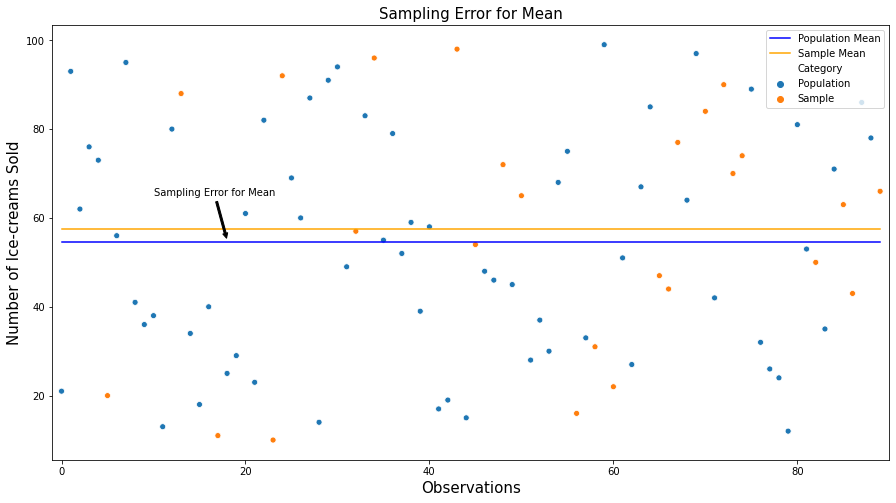

In [7]:
# create dataframes using dictionaries to store population
df_pop = pd.DataFrame(dict(Observation = data, Category = 'Population'))

# use for loop and if condition to assign the category 'Sample' to all the points in the sample
for i in df_pop['Observation']:
    if i in sample:
        df_pop['Category'][df_pop.Observation == i] = 'Sample'

# plot the scatter plot of population
# pass the indices of population to the parameter, 'x'
# pass the observations to the parameter, 'y'
# pass the label for the representation of population points to the parameter, 'label'
# pass the variable 'Category' in the dataframe to the parameter, 'hue'
# pass hte required order of the levels in the 'hue' variable to the parameter, 'hue_order'
ax = sns.scatterplot(x = np.arange(0, len(data)), y = data, hue = df_pop['Category'], hue_order = ['Population', 'Sample'])

# plot a horizontal line at population mean 
x, y = [0, 89], [pop_mean, pop_mean]
plt.plot(x, y, color = 'blue', label = 'Population Mean')

# plot a horizontal line at sample mean 
x, y = [0, 89], [samp_mean, samp_mean]
plt.plot(x, y, color = 'orange', label = 'Sample Mean')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = 'Sampling Error for Mean', xy = (18, 55), xytext = (10, 65), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# set the limit for x-axis
plt.xlim(-1, 90)

# add legend to the plot
plt.legend()

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Observations', fontsize = 15)
plt.ylabel('Number of Ice-creams Sold', fontsize = 15)
plt.title('Sampling Error for Mean', fontsize = 15)

# display the plot
plt.show()

<a id="int"></a>
## 2.2 Interval Estimation for Mean

This method considers the range of values in which the population parameter is likely to lie. The confidence interval is an interval that describes the range of values in which the parameter lies with a specific probability. It is given by the formula,<br> <p style='text-indent:20em'> `conf_interval = sample statistic ± margin of error`</p>

The uncertainty of an estimate is described by the `confidence level` which is used to calculate the margin of error. 

<a id="large"></a>
### 2.2.1 Large Sample Size

Consider a population with mean $\mu$ and standard deviation $\sigma$. Let us take a sample of `n` observations from the population such that, $n \geq 30$. The central limit theorem states that the sampling distribution of mean follows a normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt(n)}$.

The confidence interval for the population mean with $100(1-\alpha)$% confidence level is given as: $\overline{X} \pm Z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$

Where, <br>
$\overline{X}$: Sample mean<br>
$\alpha$: Level of significance<br>
$\sigma$: Population standard deviation<br>
$n$: Sample size

The quantity $\frac{\sigma}{\sqrt{n}}$ is the standard error of the mean. And the margin of error is given by $Z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$.

If we know the expected margin of error (ME), then we can calculate the required sample size (n) using the formula: $n = (Z_{\frac{\alpha}{2}})^{2}\frac{\sigma^{2}}{ME^{2}}$.
 
The above equation is valid for any population provided the sample size is sufficiently large (usually $n \geq 30$). Relace $\sigma$ by the standard deviation of the sample ($s$) if the population standard deviation is not known.

The value of $Z_{\frac{\alpha}{2}}$ for different $\alpha$ values can be obtained using the `stats.norm.isf()` from the scipy library. 

In [8]:
# let us find the Z-values for different alpha values

# create an empty dataframe to store the alpha and corresponding Z-value
df_Z = pd.DataFrame()

# create a dictionary of different alpha values
alpha =  [0.1, 0.05, 0.02, 0.01] 

# use for loop to calculate the value for each alpha
for i in range(len(alpha)):
    alpha_by_2 = alpha[i] / 2
    
    # use 'stats.norm.isf()' to find the Z-value corresponding to the upper tail probability 'q'
    # pass the value of 'alpha_by_2' to the parameter 'q'
    # use 'round()' to round-off the value to 4 digits
    Z = np.abs(round(stats.norm.isf(q = alpha_by_2), 4))
    
    # create a dataframe using dictionary to store the alpha and corresponding Z-value
    # set the loop iterator 'i' as the index of the dataframe
    row =  pd.DataFrame({"alpha": alpha[i], "Z_alpha_by_2" : Z}, index = [i])
    
    # append the row to the dataframe 'df_Z'
    df_Z = df_Z.append(row)

# print the final dataframe
df_Z

,alpha,Z_alpha_by_2
0,0.10,1.6449
1,0.05,1.9600
2,0.02,2.3263
3,0.01,2.5758


To calculate the confidence interval with 95% confidence, use the Z-value corresponding to `alpha = 0.05`. 

### Example:

#### 1. A random sample of weight (in kg.) for 35 diabetic patients is drawn from the population with a standard deviation of 8 kg. Find the 90% confidence interval for the population mean.

    Weight: [59.1, 65.0, 75.8, 79.2, 95.0, 99.8, 89.1, 65.3, 41.9, 55.2, 94.8, 84.1, 83.2, 74.0, 75.5, 76.2, 79.1, 80.1, 
             92.1, 74.2, 59.2, 64.0, 75, 78.2, 95.6, 97.8, 89.5, 64.2, 41.8, 57.2, 85, 91.4, 81.8, 74.6, 90]

In [9]:
# given sample
weight = [59.1, 65.0, 75.8, 79.2, 95.0, 99.8, 89.1, 65.3, 41.9, 55.2, 94.8, 84.1, 83.2, 74.0, 75.5, 76.2, 79.1, 80.1, 
          92.1, 74.2, 59.2, 64.0, 75, 78.2, 95.6, 97.8, 89.5, 64.2, 41.8, 57.2, 85, 91.4, 81.8, 74.6, 90]

# number of observations in sample
n = len(weight)

# given population standard deviation
std_pop = 8

# calculate the 90% confidence interval
# pass the sample mean to the parameter, 'loc'
# pass the scaling factor (std_pop / n^(1/2)) to the parameter, 'scale'
interval = stats.norm.interval(0.90, loc = np.mean(weight), scale = std_pop / np.sqrt(n))

# print the 90% confidence interval
# use 'round()' to round-off the value to 2 digits
print('The 90% confidence interval of population mean is', np.round(interval,2))

The 90% confidence interval of population mean is [74.46 78.91]


#### Let us calculate the confidence interval without using the built-in function.

In [10]:
# given sample
weight = [59.1, 65.0, 75.8, 79.2, 95.0, 99.8, 89.1, 65.2, 41.9, 55.2, 94.8, 84.1, 83.2, 74.0, 75.5, 76.2, 79.1, 80.1, 
          92.1, 74.2, 59.2, 64.0, 75, 78.2, 95.6, 97.8, 89.5, 64.2, 41.8, 57.2, 85, 91.4, 81.8, 74.6, 90]

# calculate sample mean
avg  = np.mean(weight) 

# given population standard deviation 
std_pop = 8

# number of observations in sample
n = len(weight)

# Z-value for 90% confidence level                
z_alpha_by_2 = 1.6449

# calculate the lower and upper bound of interval using the formula
lower_int = avg - (z_alpha_by_2 * (std_pop / np.sqrt(n)))
upper_int = avg + (z_alpha_by_2 * (std_pop / np.sqrt(n)))

# print the 90% confidence interval
# use 'round()' to round-off the value to 2 digits
print('90% confidence interval for population mean is', (round(lower_int,2), round(upper_int,2)))

90% confidence interval for population mean is (74.46, 78.91)


Let us visualize the confidence interval for the population mean.

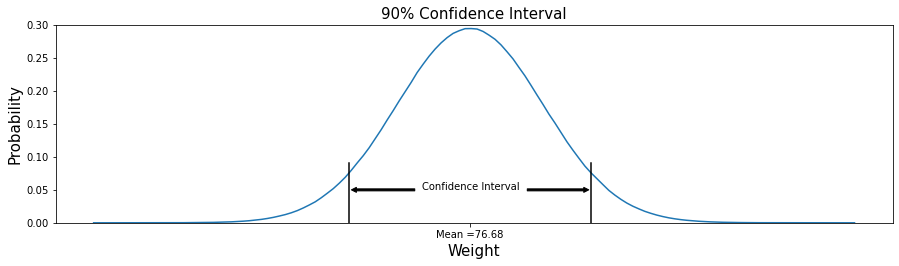

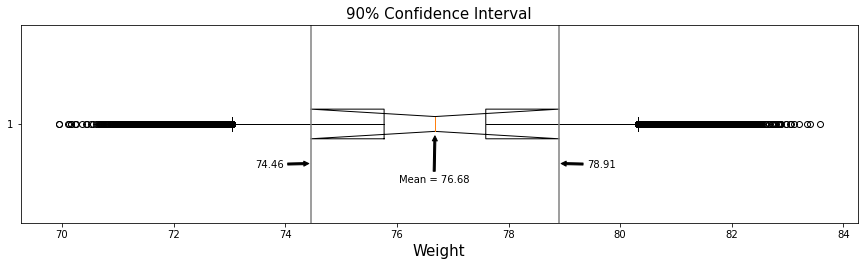

In [11]:
# given sample
weight = [59.1, 65.0, 75.8, 79.2, 95.0, 99.8, 89.1, 65.2, 41.9, 55.2, 94.8, 84.1, 83.2, 74.0, 75.5, 76.2, 79.1, 80.1, 
          92.1, 74.2, 59.2, 64.0, 75, 78.2, 95.6, 97.8, 89.5, 64.2, 41.8, 57.2, 85, 91.4, 81.8, 74.6, 90]

# number of observations in sample
n = len(weight)

# calculate sample mean
samp_mean = np.mean(weight)

# calculate sample standard deviaiton
samp_sd = np.std(weight)

# given population standard deviation 
std_pop = 8

# plot a first subplot
plt.subplot(2, 1, 1)

# consider a random variable 'X' that follows a normal distribution with sample mean and sample standard deviation  
# pass the sample mean to the parameter, 'loc'
# pass the 'std_pop/np.sqrt(n)' to the parameter, 'scale' 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.norm.rvs(loc = samp_mean, scale = std_pop/np.sqrt(n), size = 5000000, random_state = 28)

# plot the distribution of X
# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.3)

# calculate the 90% confidence interval
# pass the sample mean to the parameter, 'loc'
# pass the scaling factor (std_pop / n^(1/2)) to the parameter, 'scale'
lower_val, upper_val = stats.norm.interval(0.9, loc = samp_mean, scale = std_pop / np.sqrt(n))

# plot a vertical line at lower value of confidence interval
x, y = [lower_val, lower_val], [0, 0.09]
plt.plot(x, y, color = 'black')

# plot a vertical line at upper value of confidence interval
x, y = [upper_val, upper_val], [0, 0.09]
plt.plot(x, y, color = 'black')

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = 75.8, y = 0.05, s = 'Confidence Interval')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = '', xy = (lower_val, 0.05), xytext = (75.7, 0.05), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = '', xy = (upper_val, 0.05), xytext = (77.7, 0.05), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [samp_mean], labels = ['Mean =' + str(round(samp_mean,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Weight', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('90% Confidence Interval', fontsize = 15)

# display the plot
plt.show()


# plot the second subplot
plt.subplot(2, 1, 2)

# plot the boxplot of X
# pass the data to the parameter, 'x'
# to plot a notched boxplot use 'notch=True'
# to plot a horizontal boxplot use 'vert = False'
# overwrite the median value by sample mean using the parameter 'usermedians'
# pass a list of tuple of end points of 90% confidence interval to the parameter 'conf_intervals'
# the notches of the boxplot will be produced at values given to the parameter 'conf_intervals'
plt.boxplot(x = X, notch=True, vert = False, usermedians= [samp_mean], conf_intervals=[(lower_val, upper_val)])

# set the limit for y-axis
plt.ylim(0.5, 1.5)

# plot a vertical line at lower value of confidence interval
x, y = [lower_val, lower_val], [0.5, 1.5]
plt.plot(x, y, color = 'grey')

# plot a vertical line at upper value of confidence interval
x, y = [upper_val, upper_val], [0.5, 1.5]
plt.plot(x, y, color = 'grey')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = round(upper_val, 2), xy = (upper_val, 0.8), xytext = (upper_val+0.5, 0.78), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = round(lower_val, 2), xy = (lower_val, 0.8), xytext = (lower_val-1, 0.78), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'Mean = ' + str(round(samp_mean, 2)), xy = (samp_mean, 0.95), xytext = (samp_mean-0.65, 0.7), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Weight', fontsize = 15)
plt.title('90% Confidence Interval', fontsize = 15)

# display the plot
plt.show()

The shaded area represents the 90% confidence interval of the population mean.

#### 2. There are 150 apples on a tree. You randomly choose 40 apples and found that the average weight of apples is 182 grams with a standard deviation of 30 grams. Find the 95% confidence interval for the population mean.

In [12]:
# number of observations in the sample
n = 40

# sample mean 
sample_avg = 182

# sample standard deviation
sample_std = 30

# calculate the 95% confidence interval
# pass the sample mean to the parameter, 'loc'
# pass the scaling factor (sample_std / n^(1/2)) to the parameter, 'scale'
# as the population standard deviation is unknown, use the sample standard deviation 
interval = stats.norm.interval(0.95, loc = sample_avg, scale = sample_std/np.sqrt(n))

print('95% confidence interval for population mean is', interval)

95% confidence interval for population mean is (172.70307451543158, 191.29692548456842)


#### 3. A movie production house needs to estimate the average monthly wage of the technical crew members. The previous data shows that the standard deviation of the wages is 190 dollars. The production team thinks that the estimation of the average wage should not exceed 54 dollars. The team has decided to take a small subset of wages for the estimation. Find a suitable number of wages to be considered to get the estimate with 90% confidence.

In [13]:
# calculate sample size using the margin of error

# given population standard deviation
sigma = 190

# required margin of error
ME = 54

# calculate z_alpha_by_2 with alpha = 0.1
# use 'stats.norm.isf()' to find the Z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha/2' to the parameter 'q'
# use 'round()' to round-off the value to 4 digits
z_alpha_by_2 = np.abs(round(stats.norm.isf(q = 0.1/2), 4))

# calculate sample size (n) 
n = ((z_alpha_by_2)**2)*(sigma**2)/(ME**2)

# round-off the value of 'n' to get the integer value
print('Required Sample Size:', round(n))

Required Sample Size: 33.0


#### 4. 100 bags of coal were tested and had an average of 35% of ash with a standard deviation of 15%. Calculate the margin of error for a 90% confidence level.

In [14]:
# number of bags
n = 100

# standard deviaion 
std = 0.15

# given confidence level
conf_level = 0.90

# calculate z_alpha_by_2 with alpha = (1-conf_level) = 0.1
# use 'stats.norm.isf()' to find the Z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha/2' to the parameter 'q'
# use 'round()' to round-off the value to 4 digits
z_alpha_by_2 = np.abs(round(stats.norm.isf(q = 0.1/2), 4))

# calculate margin of error
error = (z_alpha_by_2*std)/ np.sqrt(n)

print('Margin of error:', error)

Margin of error: 0.024673499999999998


#### 5. From a sample of 250 observations, it is found that the average income of a 27 year old Londoner is £45,000 with a sample standard deviation of £4000. Obtain the 95% confidence interval to estimate the average income.

In [15]:
# number of observations in the sample
n = 250

# sample mean 
sample_avg = 45000

# sample standard deviation
sample_std = 4000

# calculate the 95% confidence interval
# pass the sample mean to the parameter, 'loc'
# pass the scaling factor (sample_std / n^(1/2)) to the parameter, 'scale'
# as the population standard deviation is unknown, use the sample standard deviation 
interval = stats.norm.interval(0.95, loc = sample_avg, scale = sample_std/np.sqrt(n))

print('95% confidence interval for average income:', interval)

95% confidence interval for average income: (44504.16397415635, 45495.83602584365)


<a id="small"></a>
### 2.2.2 Small Sample Size

Let us take a sample of `n` observations from the population such that, $n < 30$. Here the standard deviation of the population is unknown. The confidence interval for the population mean with $100(1-\alpha)$% confidence level is given as: $\overline{X} \pm t_{\frac{\alpha}{2}, n-1}\frac{s}{\sqrt{n}}$

Where, <br>
$\overline{X}$: Sample mean<br>
$\alpha$: Level of significance<br>
$s$: Sample standard deviation<br>
$n-1$: degrees of freedom

The ratio $\frac{s}{\sqrt{n}}$ is the estimate of the standard error of the mean. And $t_{\frac{\alpha}{2}, n-1}\frac{s}{\sqrt{n}}$ is the margin of error for the estimate.

The value of $t_{\frac{\alpha}{2}, n-1}$ for different $\alpha$ values can be obtained using the `stats.t.isf()` from the scipy library.  

In [16]:
# let us find the t-values for different alpha values with 10 degrees of freedom

# create an empty dataframe to store the alpha and corresponding t-value
df_t = pd.DataFrame()

# create a dictionary of different alpha values
alpha =  [0.1, 0.05, 0.02, 0.01] 

# use for loop to calculate the t-value for each alpha value
for i in range(len(alpha)):
    alpha_by_2 = alpha[i] / 2
    
    # use 'stats.t.isf()' to find the t-value corresponding to the upper tail probability 'q'
    # pass the value of 'alpha_by_2' to the parameter 'q'
    # pass the 10 degrees of freedom to the parametr 'df' 
    # use 'round()' to round-off the value to 2 digits
    t = np.abs(round(stats.t.isf(q = alpha_by_2, df = 10), 2))

    # create a dataframe using dictionary to store the alpha and corresponding t-value 
    # set the loop iterator 'i' as the index of the dataframe
    row =  pd.DataFrame({"alpha": alpha[i], "t_alpha_by_2": t}, index = [i])

    # append the row to the dataframe 'df_t'
    df_t = df_t.append(row)

# print the final dataframe
df_t

,alpha,t_alpha_by_2
0,0.10,1.81
1,0.05,2.23
2,0.02,2.76
3,0.01,3.17


### Example:

#### 1. There are 150 apples on a tree. You randomly choose 17 apples and found that the average weight of apples is 78 grams with a standard deviation of 23 grams. Find the 90% confidence interval for the population mean.

In [17]:
# number of observations in the sample
n = 17

# sample mean 
sample_avg = 78

# sample standard deviation
sample_std = 23

# calculate the 90% confidence interval for the population mean
# pass the 'n-1' degrees of freedom to the parameter, 'df' 
# pass the sample mean to the parameter, 'loc'
# pass the scaling factor (sample_std / n^(1/2)) to the parameter, 'scale'
# as the population standard deviation is unknown, use the sample standard deviation 
interval = stats.t.interval(0.90, df = n-1, loc = sample_avg, scale = sample_std/np.sqrt(n))

print('90% confidence interval for population mean is', interval)

90% confidence interval for population mean is (68.26090326067306, 87.73909673932694)


<a id="prop"></a>
## 2.3 Interval Estimation for Proportion

Consider a population in which each observation is either a success or a failure. The population proportion is denoted by `P` which the ratio of the number of successes to the size of the population.

The confidence interval for the population proportion with $100(1-\alpha)$% confidence level is given as: $p \pm Z_{\frac{\alpha}{2}}\sqrt{\frac{p(1 - p)}{n}}$

Where, <br>
$p$: Sample proportion<br>
$\alpha$: Level of significance<br>
$n$: Sample size

The quantity $Z_{\frac{\alpha}{2}}\sqrt{\frac{p(1 - p)}{n}}$ is the margin of error.

### Example:

#### 1. A financial firm has created 50 portfolios. From them, a sample of 13 portfolios was selected, out of which 8 were found to be underperforming. Construct a 99% confidence interval to estimate the population proportion.

In [18]:
# total count of portfolios
N = 50

# number of portfolios in a sample
n = 13

# number of underperforming portfolios in a sample
x = 8

# sample proportion
p_samp = x/n

# calculate the 99% confidence interval
# pass the sample proportion to the parameter, 'loc'
# pass the scaling factor ((p_samp*(1-p_samp))/n))^0.5) to the parameter, 'scale'
interval = stats.norm.interval(0.99, loc = p_samp, scale = np.sqrt((p_samp*(1-p_samp))/n))

print('99% confidence interval for population proportion is', interval)

99% confidence interval for population proportion is (0.26782280814713805, 0.9629464226220927)


<a id="defn"></a>
# 3. Test of Hypothesis

It is the process of evaluating the validity of the claim made using the sample data obtained from the population. A statistical test is a rule used to decide the acceptance or rejection of the claim.

**Examples of hypothesis:**

        1. One can get 'A' grade if the attendance in the class is more than 75%.
        2. A probiotic drink can improve the immunity of a person. 

<a id="types"></a>
## 3.1 Types of Hypothesis

`Null Hypothesis`: The null hypothesis is the claim suggesting 'no difference'. It is denoted as H<sub>0</sub>.

`Alternative Hypothesis`: It is the hypothesis that is tested against the null hypothesis. The acceptance or rejection of the hypothesis is based on the likelihood of H<sub>0</sub> being true. It is denoted by H<sub>a</sub> or H<sub>1</sub>.

#### Example:

A company that produces tennis balls claimed that the diameter of a tennis ball is at least 2.625 inches on average. On the other hand, a professional tennis coach claimed that the diameter of a ball is less than what the company has claimed. To test the claim of the coach, a statistical test can be performed considering the hypothesis:

                    Null Hypothesis: Average diameter ≥ 2.625
                    Alternative Hypothesis: Average diameter < 2.625

<a id="test_type"></a>
# 4. Types of Test

The hypothesis test is used to validate the claim given by the null hypothesis. The types of tests are based on the nature of the alternative hypothesis. 

<a id="2tailed"></a>
## 4.1 Two Tailed Test

Two tailed test considers the value of the population parameter is less than or greater than (i.e. not equal) a specific value. <br>
If we test the population mean ($\mu$) with a specific value ($\mu_{0}$) the null hypothesis is: $H_{0}: \mu = \mu_{0}$. 

The alternative hypothesis for the two tailed test is given as: $H_{1}: \mu \neq \mu_{0}$

#### Example:

A company that produces tennis balls claimed that the diameter of a tennis ball is 2.625 inches on average. To test the company's claim, a statistical test can be performed considering the hypothesis:

                    Null Hypothesis: Average diameter = 2.625
                    Alternative Hypothesis: Average diameter ≠ 2.625

<a id="1tailed"></a>
## 4.2 One Tailed Test

One tailed test considers the value of the population parameter is less than or greater than (but not both) a specific value. <br>
If we test the population mean ($\mu$) with a specific value ($\mu_{0}$) the null hypothesis is: $H_{0}: \mu \leq \mu_{0}$ and the alternative hypothesis is $H_{1}: \mu > \mu_{0}$, the one tailed test is also known as a `right-tailed test`.

If we test the population mean ($\mu$) with a specific value ($\mu_{0}$) the null hypothesis is: $H_{0}: \mu \geq \mu_{0}$ and the alternative hypothesis is $H_{1}: \mu < \mu_{0}$, the one tailed test is also known as a `left-tailed test`.


### Example:

**1.** The company's annual quality report of machines states that a lathe machine works efficiently at most for 8 months on average after the servicing. The production manager claims that after the special tuxan servicing, the machine works efficiently for more than 8 months. To test the claim of production manager consider the hypothesis:

                    Null Hypothesis: Machine efficiency ≤ 8 months
                    Alternative Hypothesis: Machine efficiency > 8 months

This is the example of a **right-tailed test**. 

**2.** A railway authority claims that all the trains on the Chicago-Seattle route run with a speed of at least 54 mph on average. A customer forum declares that there are various records from passengers claiming that the speed of the train is less than what railway has claimed. In this scenario, a statistical test can be performed to test the claim of customer forum considering the hypothesis:

                    Null Hypothesis: Speed ≥ 56 mph
                    Alternative Hypothesis: Speed < 56 mph

This is the example of a **left-tailed test**. 

<a id="eg"></a>
# 5. Hypothesis Tests with Z Statistic

Let us perform one sample Z test for the population mean. We compare the population mean with a specific value. The sample is assumed to be taken from a population following a normal distribution.

To check the normality of the data, a test for normality is used. The `Shapiro-Wilk Test` is one of the methods used to check the normality. The hypothesis of the test is given as:
<p style='text-indent:25em'> <strong> H<sub>0</sub>:  The data is normally distributed </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  The data is not normally distributed </strong> </p>

The `shapiro()` from scipy library performs a Shapiro-Wilk normality test. 

The null and alternative hypothesis of Z-test is given as:
<p style='text-indent:25em'> <strong> $H_{0}: \mu = \mu_{0}$ or $\mu \geq \mu_{0}$ or $\mu \leq \mu_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: \mu \neq \mu_{0}$ or $\mu < \mu_{0}$ or $\mu > \mu_{0}$</strong></p>

Consider a normal population with standard deviation $\sigma$. Let us take a sample of size n, such that (n > 30). 
The test statistic for one sample Z-test is given as:
<p style='text-indent:25em'> <strong> $Z = \frac{\overline{X} -  \mu}{\frac{\sigma}{\sqrt(n)}}$</strong></p>

Where, <br>
$\overline{X}$: Sample mean<br>
$\mu$: Specified mean<br>
$\sigma$: Population standard deviation<br>
$n$: Sample size

Under $H_{0}$ the test statistic follows a standard normal distribution.

If $\sigma$ is unknown, use the sample standard deviation (s) instead of $\sigma$ to calculate the test statistic.

### Example:

#### 1. A car manufacturing company claims that the mileage of their new car is 25 kmph with a standard deviation of 2.5 kmph. A random sample of 45 cars was drawn and recorded their mileage as per the standard procedure. From the sample, the mean mileage was seen to be 24 kmph. Is this evidence to claim that the mean mileage is different from 25kmph? (assume the normality of the data) Use α = 0.01.

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu = 25 $<br>
H<sub>1</sub>: $\mu ≠ 25 $

Here ⍺ = 0.01, for a two-tailed test calculate the critical z-value.

In [19]:
# calculate the z-value for 99% of confidence level
# use 'stats.norm.isf()' to find the z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha/2' to the parameter 'q', here alpha = 0.01
# use 'round()' to round-off the value to 2 digits
z_val = np.abs(round(stats.norm.isf(q = 0.01/2), 2))

print('Critical value for two-tailed Z-test:', z_val)

Critical value for two-tailed Z-test: 2.58


i.e. if z is less than -2.58 or greater than 2.58 then we reject the null hypothesis.

In [20]:
# define a function to calculate the Z-test statistic 
# pass the population mean, population standard deviation, sample size and sample mean as the function input
def z_test(pop_mean, pop_std, n, samp_mean):
   
    # calculate the test statistic
    z_score = (samp_mean - pop_mean) / (pop_std / np.sqrt(n))

    # return the z-test value
    return z_score

# given data
n = 45
pop_mean = 25
pop_std = 2.5
samp_mean = 24

# calculate the test statistic using the function 'z_test'
z_score = z_test(pop_mean, pop_std, n, samp_mean)
print("Z-score:", z_score)

Z-score: -2.6832815729997477


In [21]:
# calculate the corresponding p-value for the test statistic
# use 'cdf()' to calculate P(Z <= z_score)
p_value = stats.norm.cdf(z_score)

# for a two-tailed test multiply the p-value by 2
req_p = p_value*2
print('p-value:', req_p)

p-value: 0.007290358091535638


In [22]:
# calculate the 99% confidence interval for the population mean
# pass the sample mean to the parameter, 'loc'
# pass the scaling factor (pop_std / n^(1/2)) to the parameter, 'scale'
print('Confidence interval:', stats.norm.interval(0.99, loc = samp_mean, scale = pop_std / np.sqrt(n)))

Confidence interval: (23.040045096471452, 24.959954903528548)


Here the z score is less than -2.58, p-value is less than 0.01, also the confidence interval do not contain the value in the null hypothesis (i.e. 25), thus we reject the null hypothesis and conclude that there is enough evidence to claim that the mean mileage is different from 25kmph.

Let us plot the acceptance and rejection region for a two-tailed test  with 99% confidence.

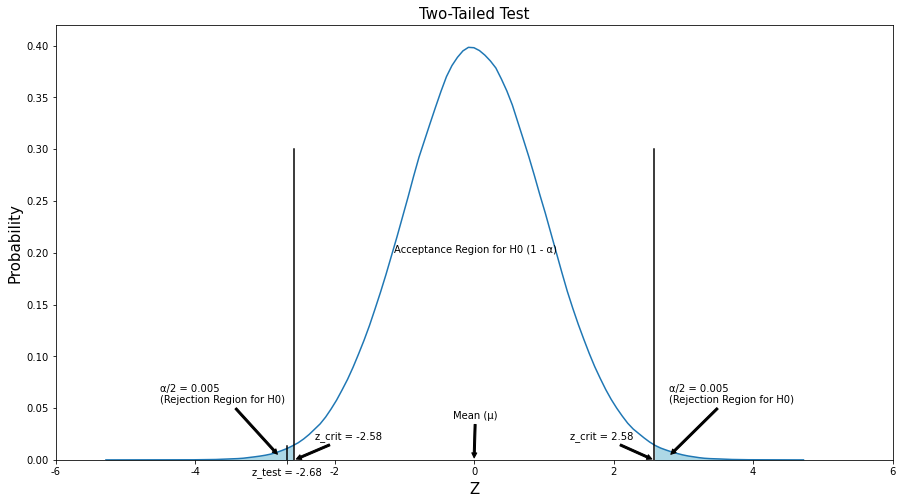

In [23]:
# consider a random variable 'X' that follows a standard normal distribution 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.norm.rvs(size = 1000000, random_state = 20)

# plot the distribution of X
# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.42)

# use 'stats.norm.isf()' to calculate the critical z-value for alpha = 0.01
# pass the value of 'alpha/2' to the parameter 'q' for a two-tailed test
z = stats.norm.isf(q = 0.01/2)

# plot a vertical line at z-value
x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at -(z-value)
x, y = [-z, -z], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at z-score value
x, y = [z_score, z_score], [0, 0.013]
plt.plot(x, y, color = 'black')

# add the color to the right of the z-value and left of -(z-value)
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical z-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')

# fill the color for the region where x-values are less than -(z-value)
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 <= -z], y1[x1 <= -z], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = 'Mean (μ)', xy = (0, 0), xytext = (-0.3, 0.04), arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'α/2 = 0.005\n(Rejection Region for H0)', xy = (2.8, 0.004), xytext = (2.8, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'α/2 = 0.005\n(Rejection Region for H0)', xy = (-2.8, 0.004), xytext = (-4.5, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(z,2)), xy = (z, 0), xytext = (z-1.2, 0.02), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(-z,2)), xy = (-z, 0), xytext = (-z+0.3, 0.02), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -1.15, y = 0.2, s = 'Acceptance Region for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [-6, -4, -2, 0, 2, 4, 6, round(z_score,2)], 
           labels = [-6, -4, -2, 0, 2, 4, 6, 'z_test = '+str(round(z_score,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Two-Tailed Test', fontsize = 15)

# display the plot
plt.show()

The above plot shows that the test statistic value is in the rejection region, that implies we reject $H_{0}$ and conclude that there is enough evidence to claim that the mean mileage is different from 25kmph.

#### 2. The average calories in a slice bread of the brand 'Alphas' are 82 with a standard deviation of 15. An experiment is conducted to test the claim of the dietitians that the calories in a slice of bread are not as per the manufacturer's specification. A sample of 40 slices of bread is taken and the mean calories recorded are 95. Test the claim of dietitians with ⍺ value (significance level) as 0.05. (assume the normality of the data).

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu = 82 $<br>
H<sub>1</sub>: $\mu ≠ 82 $

Here ⍺ = 0.05, for a two-tailed test calculate the critical z-value.

In [24]:
# calculate the z-value for 95% of confidence level
# use 'stats.norm.isf()' to find the z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha/2' to the parameter 'q', here alpha = 0.05
# use 'round()' to round-off the value to 2 digits
z_val = np.abs(round(stats.norm.isf(q = 0.05/2), 2))

print('Critical value for two-tailed Z-test:', z_val)

Critical value for two-tailed Z-test: 1.96


i.e. if z is less than -1.96 or greater than 1.96 then we reject the null hypothesis.

In [25]:
# define a function to calculate the Z-test statistic 
# pass the population mean, population standard deviation, sample size and sample mean as the function input
def z_test(pop_mean, pop_std, n, samp_mean):
   
    # calculate the test statistic
    z_score = (samp_mean - pop_mean) / (pop_std / np.sqrt(n))

    # return the z-test value
    return z_score

# given data
n = 40
pop_mean = 82
pop_std = 15
samp_mean = 95

# calculate the test statistic using the function 'z_test'
z_score = z_test(pop_mean, pop_std, n, samp_mean)
print("Z-score:", z_score)

Z-score: 5.4812812776251905


In [26]:
# calculate the corresponding p-value for the test statistic
# use 'cdf()' to calculate P(Z <= -z_score)
p_value = stats.norm.cdf(-z_score)

# for a two-tailed test multiply the p-value by 2
req_p = p_value*2
print('p-value:', req_p)

p-value: 4.222565249683579e-08


In [27]:
# calculate the 95% confidence interval for the population mean
# pass the sample mean to the parameter, 'loc'
# pass the scaling factor (pop_std / n^(1/2)) to the parameter, 'scale'
print('Confidence interval:', stats.norm.interval(0.95, loc = samp_mean, scale = pop_std / np.sqrt(n)))

Confidence interval: (90.35153725771579, 99.64846274228421)


Here the z score is greater than 1.96, the p-value is less than 0.05, also the confidence interval do not contain the value in the null hypothesis (i.e. 82), thus we reject the null hypothesis and thus, there is enough evidence to conclude that the average calories in a slice bread are not 82.

#### 3. A typhoid vaccine in the market inscribes 3 mg of ascorbic acid in the vaccine. A research team claims that the vaccines contain less than 3 mg of acid. We collected the data of 40 vaccines by using random sampling from a population and recorded the amount of ascorbic acid. Test the claim of the research team using the sample data ⍺ value (significance level) to 0.05.

    acid_amt = [2.57, 3.06, 3.28 , 3.24, 2.79, 3.40, 3.36, 3.07, 2.46, 3.03, 3.05, 2.94, 3.46, 3.19, 3.09, 2.81, 3.13, 2.88, 
                2.76, 2.75, 3.17, 2.89, 2.54, 3.18, 3.08, 2.60, 3.06, 3.13, 3.11, 3.08, 2.93, 2.90, 3.06, 2.97, 3.24, 2.86, 
                2.87, 3.18, 3, 2.95]

Let us check the normality of the data.

In [28]:
# given data
acid_amt = [2.57, 3.06, 3.28 , 3.24, 2.79, 3.40, 3.36, 3.07, 2.46, 3.03, 3.05, 2.94, 3.46 , 3.19, 3.09,2.81, 3.13, 2.88, 2.76, 
            2.75, 3.17, 2.89, 2.54, 3.18, 3.08, 2.60, 3.06, 3.13, 3.11, 3.08, 2.93, 2.90, 3.06, 2.97, 3.24, 2.86, 2.87, 3.18, 
            3, 2.95]

# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the sample data to perform the test
stat, p_value = shapiro(acid_amt)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9764790534973145
P-Value: 0.5609316825866699


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the data is normally distributed.

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu \geq 3 $<br>
H<sub>1</sub>: $\mu < 3 $

Here ⍺ = 0.05, for a one-tailed test calculate the critical z-value.

In [29]:
# calculate the z-value for 95% of confidence level
# use 'stats.norm.isf()' to find the z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# use 'round()' to round-off the value to 2 digits
z_val = np.abs(round(stats.norm.isf(q = 0.05), 2))

print('Critical value for one-tailed Z-test:', z_val)

Critical value for one-tailed Z-test: 1.64


i.e. if z is less than -1.64 then we reject the null hypothesis.

In [30]:
# given amount of ascorbic acid in the vaccines
acid_amt = [2.57, 3.06, 3.28 , 3.24, 2.79, 3.40, 3.36, 3.07, 2.46, 3.03, 3.05, 2.94, 3.46 , 3.19, 3.09, 2.81, 3.13, 2.88, 2.76, 
            2.75, 3.17, 2.89, 2.54, 3.18, 3.08, 2.60, 3.06, 3.13, 3.11, 3.08, 2.93, 2.90, 3.06, 2.97, 3.24, 2.86, 2.87, 3.18, 
            3, 2.95]

# 'ztest()' returns the test statistic and corresponding p-value
# pass the sample data to the parameter, 'x1'
# pass the value in null hypothesis to the parameter, 'value'
# pass the one-tailed condition to the parameter, 'alternative'
z_score, pval = stests.ztest(x1 = acid_amt, value = 3, alternative = 'smaller')

# print the test statistic and corresponding p-value
print("Z-score: ", z_score)
print("p-value: ", pval)

Z-score:  0.08289008952836197
p-value:  0.5330305328333862


In [31]:
# calculate the 95% confidence interval for the population mean
# pass the sample mean to the parameter, 'loc'
# pass the scaling factor (standard deviation of sample / n^(1/2)) to the parameter, 'scale'
# use 'stdev()' to calculate sample standard deviation
print('Confidence interval:', stats.norm.interval(0.95, loc = np.mean(acid_amt), 
                                                  scale = statistics.stdev(acid_amt) / np.sqrt(len(acid_amt))))

Confidence interval: (2.932063993209846, 3.0739360067901544)


Here the z-score is greater than -1.64, the p-value is greater than 0.05, also the confidence interval contains the value in the null hypothesis (i.e. 3), thus we fail to reject (i.e. accept) the null hypothesis. Thus, there is no enough evidence to conclude that on average a typhoid vaccine contains less than 3 mg of ascorbic acid.

Let us plot the acceptance and rejection region for a left-tailed test with 95% confidence.

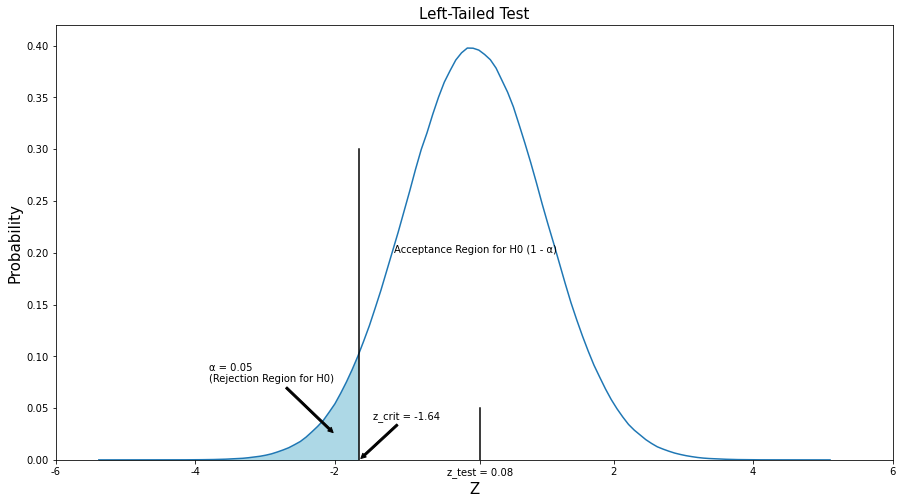

In [32]:
# consider a random variable 'X' that follows a standard normal distribution 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.norm.rvs(size = 2000000, random_state = 20)

# plot the distribution of X
# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.42)

# use 'stats.norm.isf()' to calculate the critical z-value for alpha = 0.05
# pass the value of 'alpha' to the parameter 'q'
z = stats.norm.isf(q = 0.05)

# as normal distribution is symmetric, for a left-tailed test draw a line at -(z-value)
# plot a vertical line at -(z-value) 
x, y = [-z, -z], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at z-score value
x, y = [z_score, z_score], [0, 0.05]
plt.plot(x, y, color = 'black')

# add the color to the left of the -(z-value)
# get the data for x and y axes for the distribution plot
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are less than -(z-value)
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 <= -1.64], y1[x1 <= -1.64], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = 'α = 0.05\n(Rejection Region for H0)', xy = (-2, 0.025), xytext = (-3.8, 0.075), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(-z,2)), xy = (-z, 0), xytext = (-z+0.2, 0.04), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -1.15, y = 0.2, s = 'Acceptance Region for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [-6, -4, -2, 2, 4, 6, round(z_score,2)], 
           labels = [-6, -4, -2, 2, 4, 6, 'z_test = '+str(round(z_score,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Left-Tailed Test', fontsize = 15)

# display the plot
plt.show()

The above plot shows that the test statistic value is in the acceptance region, that implies we fail to reject (i.e. accept) $H_{0}$.  Thus, there is no enough evidence to conclude that on average a typhoid vaccine contains less than 3 mg of ascorbic acid.

#### 4. A sample of 900 PVC pipes is found to have an average thickness of 12.5 mm. Can we assume that the sample is coming from a normal population with mean 13 mm against that it is less than 13 mm. The population standard deviation is 1 mm. Test the hypothesis at 5% level of significance.

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu \geq 13 $<br>
H<sub>1</sub>: $\mu < 13 $

Here ⍺ = 0.05, for a one-tailed test calculate the critical z-value.

In [33]:
# calculate the z-value for 95% of confidence level
# use 'stats.norm.isf()' to find the z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# use 'round()' to round-off the value to 2 digits
z_val = np.abs(round(stats.norm.isf(q = 0.05), 2))

print('Critical value for one-tailed Z-test:', z_val)

Critical value for one-tailed Z-test: 1.64


i.e. if z is less than -1.64 then we reject the null hypothesis.

In [34]:
# define a function to calculate the Z-test statistic 
# pass the population mean, population standard deviation, sample size and sample mean as the function input
def z_test(pop_mean, pop_std, n, samp_mean):
   
    # calculate the test statistic
    z_score = (samp_mean - pop_mean) / (pop_std / np.sqrt(n))

    # return the z-test value
    return z_score

# given data
n = 900
pop_mean = 13
pop_std = 1
samp_mean = 12.5

# calculate the test statistic using the function 'z_test'
z_score = z_test(pop_mean, pop_std, n, samp_mean)
print("Z-score:", z_score)

Z-score: -15.0


In [35]:
# calculate the corresponding p-value for the test statistic
# use 'cdf()' to calculate P(Z <= z_score)
p_value = stats.norm.cdf(z_score)

print('p-value:', p_value)

p-value: 3.6709661993126986e-51


In [36]:
# calculate the 95% confidence interval for the population mean
# pass the sample mean to the parameter, 'loc'
# pass the scaling factor (pop_std / n^(1/2)) to the parameter, 'scale'
print('Confidence interval:', stats.norm.interval(0.95, loc = samp_mean, scale = pop_std / np.sqrt(n)))

Confidence interval: (12.434667867181998, 12.565332132818002)


Here the z score is less than -1.64, p-value is less than 0.05, also the confidence interval do not contain the value in the null hypothesis (i.e. 13), thus we reject the null hypothesis and conclude that the sample is not coming from the population with mean 13.

#### 5. An e-commerce company claims that the mean delivery time of food items on its website in NYC is 60 minutes with a standard deviation of 30 minutes. A random sample of 45 customers ordered from the website, and the average time for delivery was found to be 75 minutes. Is this enough evidence to claim that the average time to get items delivered is more than 60 minutes. (assume the normality of the data). Test the with α = 0.05.

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu \leq  60 $<br>
H<sub>1</sub>: $\mu > 60 $

Here ⍺ = 0.05, for a one-tailed test calculate the critical z-value.

In [37]:
# calculate the z-value for 95% of confidence level
# use 'stats.norm.isf()' to find the z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# use 'round()' to round-off the value to 2 digits
z_val = np.abs(round(stats.norm.isf(q = 0.05), 2))

print('Critical value for one-tailed Z-test:', z_val)

Critical value for one-tailed Z-test: 1.64


i.e. if z is greater than 1.64 then we reject the null hypothesis.

In [38]:
# define a function to calculate the Z-test statistic 
# pass the population mean, population standard deviation, sample size and sample mean as the function input
def z_test(pop_mean, pop_std, n, samp_mean):
   
    # calculate the test statistic
    z_score = (samp_mean - pop_mean) / (pop_std / np.sqrt(n))

    # return the z-test value
    return z_score

# given data
n = 45
pop_mean = 60
pop_std = 30
samp_mean = 75

# calculate the test statistic using the function 'z_test'
z_score = z_test(pop_mean, pop_std, n, samp_mean)
print("Z-score:", z_score)

Z-score: 3.3541019662496843


In [39]:
# calculate the corresponding p-value for the test statistic
# use 'sf()' to calculate P(Z > z_score)
p_value = stats.norm.sf(z_score)

print('p-value:', p_value)

p-value: 0.0003981150787954058


In [40]:
# calculate the 95% confidence interval for the population mean
# pass the sample mean to the parameter, 'loc'
# pass the scaling factor (pop_std / n^(1/2)) to the parameter, 'scale'
print('Confidence interval:', stats.norm.interval(0.95, loc = samp_mean, scale = pop_std / np.sqrt(n)))

Confidence interval: (66.23477459423418, 83.76522540576582)


Here the z score is greater than 1.64, the p-value is less than 0.05, also the confidence interval do not contain the value in the null hypothesis (i.e. 60), thus we reject the null hypothesis and conclude that the average time to get items delivered is more than 60 minutes.

Let us plot the acceptance and rejection region for a right-tailed test with 95% confidence.

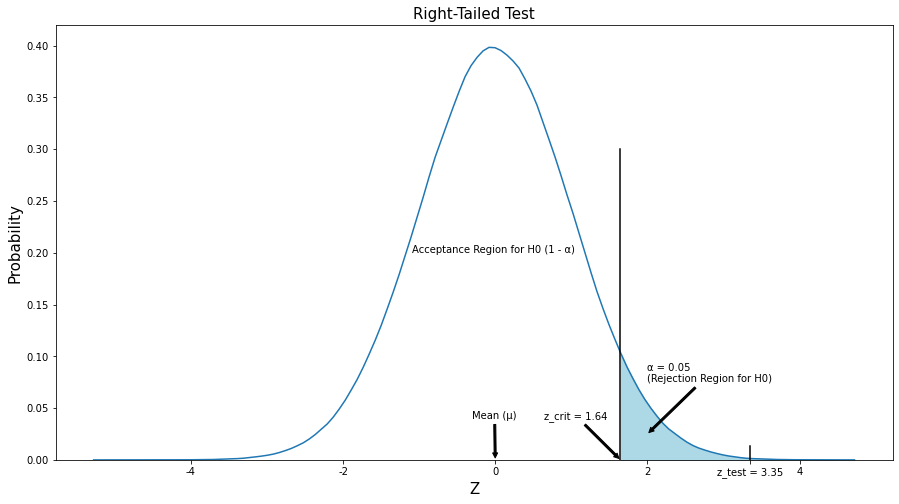

In [41]:
# consider a random variable 'X' that follows a standard normal distribution 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.norm.rvs(size = 1000000, random_state = 20)

# plot the distribution of X
# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.42)

# use 'stats.norm.isf()' to calculate the critical z-value for alpha = 0.05
# pass the value of 'alpha' to the parameter 'q'
z = stats.norm.isf(q = 0.05)

# plot a vertical line at z-value
x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at z-score value
x, y = [z_score, z_score], [0, 0.013]
plt.plot(x, y, color = 'black')

# add the color to the right of the z-value
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical z-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = 'Mean (μ)', xy = (0, 0), xytext = (-0.3, 0.04), arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'α = 0.05\n(Rejection Region for H0)', xy = (2, 0.025), xytext = (2, 0.075), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(z,2)), xy = (z, 0), xytext = (z-1, 0.04), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -1.1, y = 0.2, s = 'Acceptance Region for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [-4, -2, 0, 2, 4, round(z_score,2)], 
           labels = [-4, -2, 0, 2, 4, 'z_test = '+str(round(z_score,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Right-Tailed Test', fontsize = 15)

# display the plot
plt.show()

The above plot shows that the test statistic value is in the rejection region, which implies we reject $H_{0}$ and conclude that  the average time to get items delivered is more than 60 minutes.

<a id="error"></a>
# 6. Error

The error can occur while choosing the correct hypothesis based on the statistical tests. Two types of errors are `Type I` and `Type II` error.

### Type I Error

This kind of error occurs when we reject the null hypothesis even if it is true. It is equivalent to a `false positive` conclusion. The probability of type I error is given by the value of $\alpha$, level of significance.

### Type II Error

This kind of error occurs when we fail to reject the null hypothesis even if it is wrong. It is equivalent to a `false negative` conclusion. The probability of type II error is given by the value of $\beta$.

<a id="power"></a>
## 6.1 Power of Hypothesis Test

The probability of correctly rejecting a false null hypothesis is defined as the `Power` of a test. It is calculated as `1-β`. It is the probability of avoiding the type II error. The power of the test lies between 0 to 1. The value close to 1 indicates that the test is able to reject the false null hypothesis correctly.

### Example:

#### 1. We need to determine if girls' score on average is higher than 300 in the GRE (for higher studies). The standard deviation of the population is 20. We collected the data of 40 girls by using random sampling and recorded their marks. Set ⍺ value (significance level) to 0.05 to calculate the power of the test.

    GRE scores = [311, 313, 309, 307, 302, 313, 305, 336, 322, 300, 335, 312, 282, 314, 310, 316, 301, 315, 299, 298, 308, 
                  315, 306, 321, 276, 306, 324, 308, 334, 277, 319, 322, 298, 300, 293, 333,305, 302, 317, 287]

Let us check the normality of the data.

In [42]:
# given GRE scores
scores = [311, 313, 309, 307, 302, 313, 305, 336, 322, 300, 335, 312, 282, 314, 310, 316, 301, 315, 299, 298, 308, 315, 306, 
          321, 276, 306, 324, 308, 334, 277, 319, 322, 298, 300, 293, 333,305, 302, 317, 287]

# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the sample data to perform the test
stat, p_value = shapiro(scores)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9695489406585693
P-Value: 0.3482319712638855


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the data is normally distributed.

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu \leq 300$<br>
H<sub>1</sub>: $\mu > 300$

Calculate the critical z-value for one-tailed test.

In [43]:
# calculate the z-value for 95% of confidence level
# use 'stats.norm.isf()' to find the z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# use 'round()' to round-off the value to 4 digits
z_val = np.abs(round(stats.norm.isf(q = 0.05), 4))

print('Critical value for one-tailed Z-test:', z_val)

Critical value for one-tailed Z-test: 1.6449


In [44]:
# import the function to calculate the power of test
from statsmodels.stats import power

# given GRE scores
scores = [311, 313, 309, 307, 302, 313, 305, 336, 322, 300, 335, 312, 282, 314, 310, 316, 301, 315, 299, 298, 308, 315, 306, 
          321, 276, 306, 324, 308, 334, 277, 319, 322, 298, 300, 293, 333,305, 302, 317, 287]

# number of observations 
num_obs = len(scores)

# calculate the sample mean
samp_mean = np.mean(scores)

# null hypothesis value
hypo_mean = 300

# population standard deviation
pop_sd = 20

# find the b such that, P(X > b) = alpha = 0.05
# b is calculated for the below plot
b = hypo_mean + (z_val*pop_sd)/np.sqrt(num_obs)

# use 'zt_ind_solve_power()' to calculate the power of the z-test
# keep the value of exact one parameter as 'None' to calculate the value of that parameter using remaining values 
# calculate the 'effect_size' using the sample_mean, null hypothesis value and population standard deviation
# pass the sample size to the parameter, 'nobs1'
# pass the value of alpha to the parameter, 'alpha'
# pass 'None' to the parameter 'power' as we want to calculate its value
# for one sample test, consider the 'ratio' as 0
# pass the alternative for one-tailed test to the parameter, 'alternative'
power = power.zt_ind_solve_power(effect_size = (samp_mean - hypo_mean)/pop_sd, 
                         nobs1 = num_obs, 
                         alpha = 0.05, 
                         power = None, 
                         ratio = 0, 
                         alternative = 'larger')

print('Power of the test:', power)

Power of the test: 0.8707713725498709


Here the power of the test is 0.87. Thus we can say that there is 87% chance that the test rejects a false null hypothesis. The higher value of power indicates the more powerful test.  

Let us visualize the region of the type I error, type II error and the power of the test.

<img src='power.png'>